In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/DATASET 8/SCM_Dataset_Updated_with_Green_Logistics.xlsx')

In [ ]:
df

,Company Name,SCM Practices,Supplier Count,Inventory Turnover Ratio,Lead Time (days),Order Fulfillment Rate (%),Customer Satisfaction (%),Technology Utilized,Environmental Impact Score,Supply Chain Agility,...,Supply Chain Risk (%),Supplier Collaboration Level,Supply Chain Resilience Score,Supplier Relationship Score,Total Implementation Cost,Carbon Emissions (kg CO2e),Recycling Rate (%),Energy Consumption (MWh),Use of Renewable Energy (%),Green Packaging Usage (%)
0,Apple,Agile SCM,300.0,7.0,8.0,94.0,91.0,"ERP, AI, Blockchain",70.0,High,...,7.0,High,90.0,85.0,48566365,120000,60,100000,50,40
1,Microsoft,Lean Manufacturing,200.0,5.2,15.0,91.0,89.0,"ERP, AI, Robotics",75.0,High,...,12.0,Medium,85.0,85.0,54456148,121000,61,100500,51,41
2,Google,Cross-Docking,20000.0,7.5,4.0,95.0,90.0,"AI, ERP, Blockchain",70.0,High,...,5.0,High,90.0,85.0,78733131,122000,62,101000,52,42
3,Amazon,Agile SCM,500.0,10.5,15.0,95.0,90.0,"ERP, AI, Blockchain",70.0,High,...,12.0,Medium,88.0,85.0,1635157,123000,63,101500,53,43
4,Facebook,Lean Manufacturing,100.0,5.8,12.0,89.0,88.0,"ERP, AI, Robotics",75.0,High,...,10.0,Medium,85.0,80.0,73150360,124000,64,102000,54,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Nisshin Steel Co., Ltd.",Lean Manufacturing,20000.0,8.2,15.0,91.0,90.0,"ERP, AI, Blockchain",NaN,Medium,...,10.0,Medium,85.0,80.0,11471762,1115000,65,597500,53,48
996,NSSMC,Lean Manufacturing,150.0,5.2,12.0,91.0,88.0,"ERP, AI, Blockchain",NaN,High,...,10.0,High,88.0,85.0,100846359,1116000,66,598000,54,49
997,Vallourec & Mannesmann Tubes,Vendor Managed Inventory,1300000.0,7.0,10.0,90.0,89.0,"ERP, AI, Blockchain",NaN,High,...,8.0,High,87.0,85.0,16816570,1117000,67,598500,55,50
998,Tubacex,Agile SCM,200.0,5.5,12.0,88.0,92.0,"AI, ERP, Blockchain",NaN,Medium,...,15.0,Medium,80.0,78.0,25856920,1118000,68,599000,56,51


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Preprocess the data by dropping rows with missing values in relevant columns
df = df.dropna(subset=['Carbon Emissions (kg CO2e)', 'Recycling Rate (%)',
                       'Use of Renewable Energy (%)', 'Green Packaging Usage (%)'])

# Calculate percentiles for sustainability conditions
recycling_percentile = df['Recycling Rate (%)'].quantile(0.25)
renewable_energy_percentile = df['Use of Renewable Energy (%)'].quantile(0.25)
green_packaging_percentile = df['Green Packaging Usage (%)'].quantile(0.25)
carbon_emissions_percentile = df['Carbon Emissions (kg CO2e)'].quantile(0.75)

# Apply sustainability conditions
df['Sustainability_Met'] = np.where(
    (df['Recycling Rate (%)'] > recycling_percentile) &
    (df['Use of Renewable Energy (%)'] > renewable_energy_percentile) &
    (df['Green Packaging Usage (%)'] > green_packaging_percentile) &
    (df['Carbon Emissions (kg CO2e)'] <= carbon_emissions_percentile), 1, 0
)

# Features and target variable
X = df[['Carbon Emissions (kg CO2e)', 'Recycling Rate (%)',
        'Use of Renewable Energy (%)', 'Green Packaging Usage (%)']]
y = df['Sustainability_Met']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

logreg_param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear', 'saga']
}

logreg_grid = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
logreg_grid.fit(X_train, y_train)
logreg_train_acc = logreg_grid.score(X_train, y_train)
logreg_test_acc = logreg_grid.score(X_test, y_test)

# Store results
results = {
    'Logistic Regression': {
        'Train Accuracy': logreg_train_acc,
        'Test Accuracy': logreg_test_acc,
        'Validation Accuracy': logreg_grid.best_score_
    }
}

# Tabulate Results
results_df = pd.DataFrame(results).T
print(results_df)

# User input to check metrics for a company
company_name = input("Enter the company name to evaluate sustainability metrics: ").strip()

# Check if the company exists in the dataset
if company_name in df['Company Name'].values:
    company_row = df[df['Company Name'] == company_name]
    company_metrics = company_row[[
        'Carbon Emissions (kg CO2e)', 'Recycling Rate (%)',
        'Use of Renewable Energy (%)', 'Green Packaging Usage (%)'
    ]]
    sustainability_met = company_row['Sustainability_Met'].values[0]
    sustainability_status = "met" if sustainability_met == 1 else "did not meet"

    print(f"\nSustainability metrics for {company_name}:\n{company_metrics}")
    print(f"\n{company_name} {sustainability_status} environmental sustainability criteria.")
else:
    print(f"\nCompany '{company_name}' not found in the dataset.")


                     Train Accuracy  Test Accuracy  Validation Accuracy
Logistic Regression        0.815714       0.823333             0.814286
Enter the company name to evaluate sustainability metrics: Audi

Sustainability metrics for Audi:
     Carbon Emissions (kg CO2e)  Recycling Rate (%)  \
207                      327000                  69   

     Use of Renewable Energy (%)  Green Packaging Usage (%)  
207                           65                         58  

Audi met environmental sustainability criteria.


In [ ]:
# Filter top 20 companies with the lowest carbon emissions
top_companies_carbon = df.nsmallest(20, 'Carbon Emissions (kg CO2e)')


<ipython-input-18-449f29dc5bee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


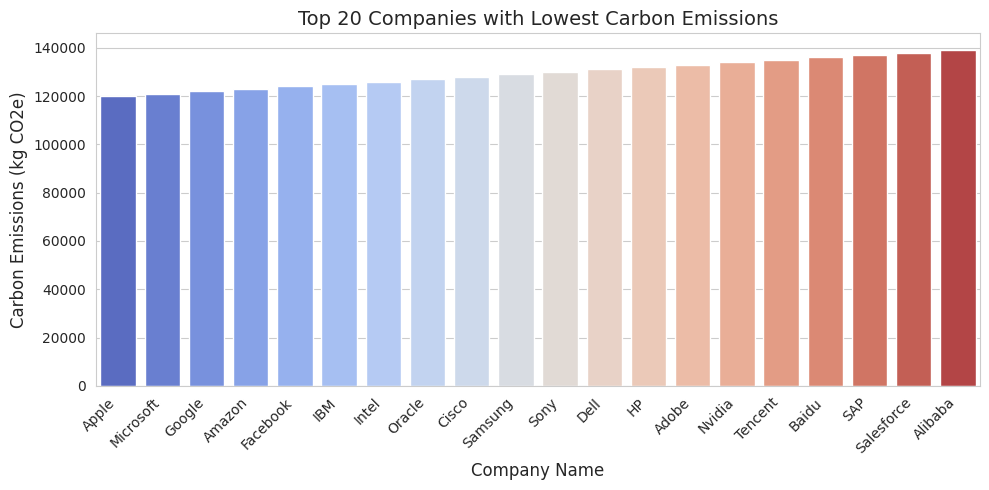

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_companies_carbon,
    x='Company Name',
    y='Carbon Emissions (kg CO2e)',
    palette='coolwarm'
)
plt.title("Top 20 Companies with Lowest Carbon Emissions", fontsize=14)
plt.ylabel("Carbon Emissions (kg CO2e)", fontsize=12)
plt.xlabel("Company Name", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


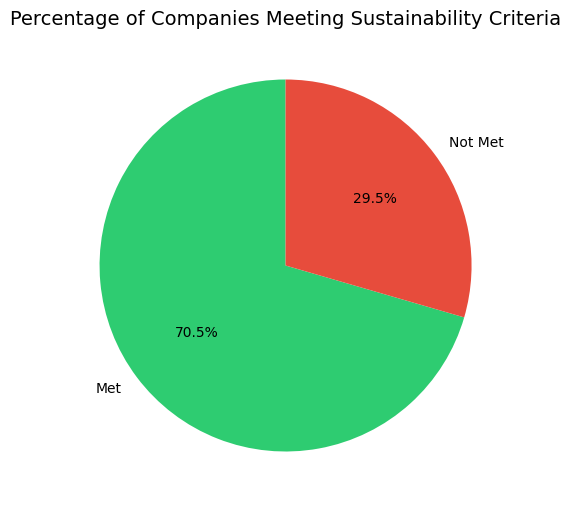

In [ ]:
# 2. Pie Chart: Distribution of Companies Meeting Sustainability
import matplotlib.pyplot as plt

sustainability_distribution = df['Sustainability_Met'].value_counts()
plt.figure(figsize=(6, 8))
plt.pie(
    sustainability_distribution,
    labels=["Met", "Not Met"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#2ecc71", "#e74c3c"]
)
plt.title("Percentage of Companies Meeting Sustainability Criteria", fontsize=14)
plt.show()
